In [1]:
import warnings
import pickle

import awkward as ak
import numpy as np

import hist as hs
from hist.intervals import ratio_uncertainty

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import mplhep as hep

plt.style.use(hep.style.CMS)
#plt.style.use('dark_background')

In [2]:
# prefix = 'samples/'
# fileset = [
#     # 'PhiToPiPi',
#     prefix + 'PhiToPi0Pi0_mPhi0p3_ctau300',
#     prefix + 'PhiToPi0Pi0_mPhi1p0_ctau300',
#     prefix + 'PhiToPiPlusPiMinus_mPhi0p3_ctau300',
#     prefix + 'PhiToPiPlusPiMinus_mPhi1p0_ctau300',
#     'backgroundNew',
#     ]

# out = {}
# for dataset in fileset:
#     filename = dataset + '.pickle'
#     infile = open(filename, 'rb')
#     out[dataset] = pickle.load(infile)
#     infile.close()

prefixes = ['cat-A','cat-B1','cat-B2','cat-B3','cat-B4']
fileset = [
    'PhiToPi0Pi0_mPhi0p3_ctau300',
    'PhiToPi0Pi0_mPhi1p0_ctau300',
    'PhiToPiPlusPiMinus_mPhi0p3_ctau300',
    'PhiToPiPlusPiMinus_mPhi1p0_ctau300',
    'data',
    ]
out = {}
for prefix in prefixes:
    out[prefix] = {}
    for dataset in fileset:
        filename = f'{prefix}/{dataset}_{prefix}.pickle'
        infile = open(filename, 'rb')
        out[prefix][dataset] = pickle.load(infile)
        infile.close()
        
vrbls = ['Eta', 'NStation10', 'AvgStation10']

In [3]:
def allsets(var, prefix, ax, cut):
    
    l = ['dotted',
         'dashed',
         'dashdot',
         (5, (10, 3)),
         'solid',]

    for dataset, line in zip(fileset,l):
        if 'data' not in dataset:
            title = f'cscRechitCluster{var} with {cut}'

            s = ''
            if 'PiPlusPiMinus' in dataset:
                s+='φ→π+π-; '
            if 'Pi0Pi0' in dataset:
                s+='φ→π0π0; '

            # if 'ctau1000' in dataset:
            #     s+='ctau = 1000mm; '
            # if 'ctau300' in dataset:
            #     s+='ctau = 300mm; '

            if '0p3' in dataset:
                s+='m = 0.3GeV;'
            if '1p0' in dataset:
                s+='m = 1.0GeV;'

            if 'PiPi' in dataset:
                s+='φ→π*π* '
            if 'data' in dataset:
                s+='data'
                            
            hep.histplot(out[prefix][dataset][title]/out[prefix][dataset][title].sum(), label = s, ax = ax, linestyle = line)
            ax.set_yscale('log')
            ax.set_xlabel(None)
            ax.set_ylim(10**-2,10**.1)


            

    ax.scatter(np.convolve(out[prefix]['data'][title].to_numpy()[1], np.ones(2), 'valid')/2, (out[prefix]['data'][title]/out[prefix]['data'][title].sum()).view(), label = 'data')
    fig.show()

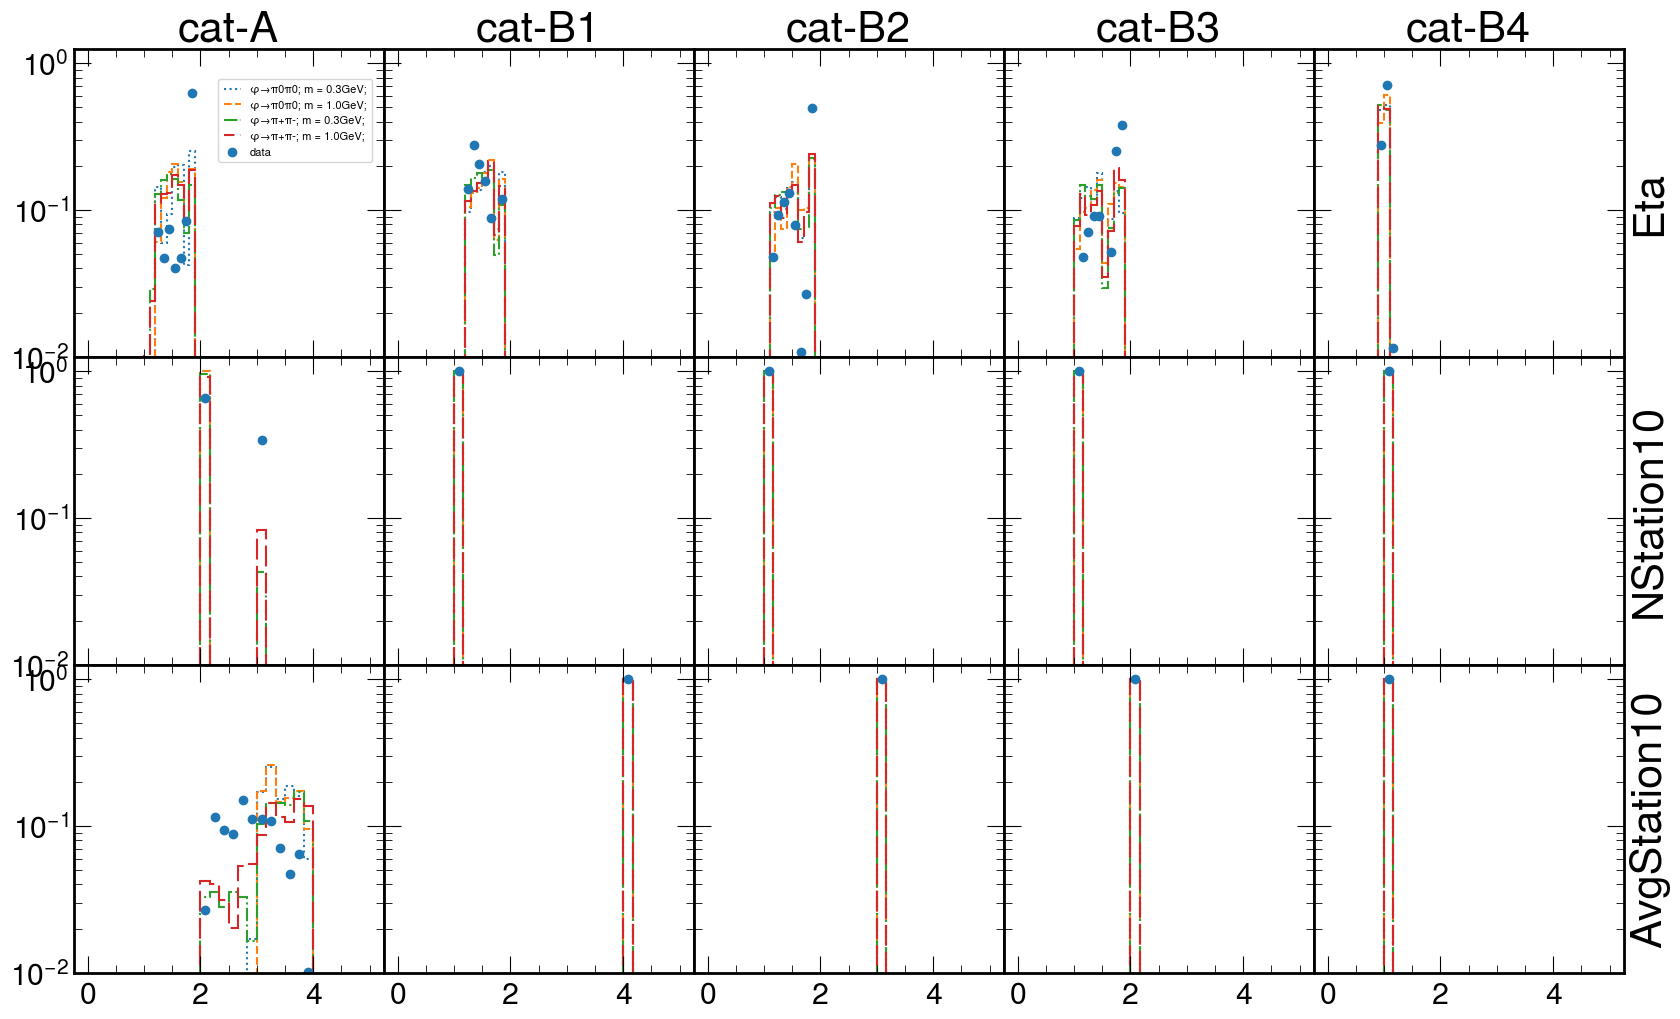

In [4]:
a = 4
fig, ax = plt.subplots(len(vrbls), len(prefixes), figsize=(a*len(prefixes),a*len(vrbls)), sharex=True, sharey=True)

for i,var in enumerate(vrbls):
    for j,cat in enumerate(prefixes):
        allsets(var, cat, ax[i][j], 'cut_based_ID')
        
for axe, col in zip(ax[0], prefixes):
    axe.set_title(col)

for axe, row in zip(ax[:,-1], vrbls):
    axe.set_ylabel(row, size='large', loc='center')
    axe.yaxis.set_label_position("right")


handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc=(.13,.84), prop={'size': 8}, frameon=True)

plt.xlabel('')
fig.subplots_adjust(hspace=0, wspace=0)
fig.show()

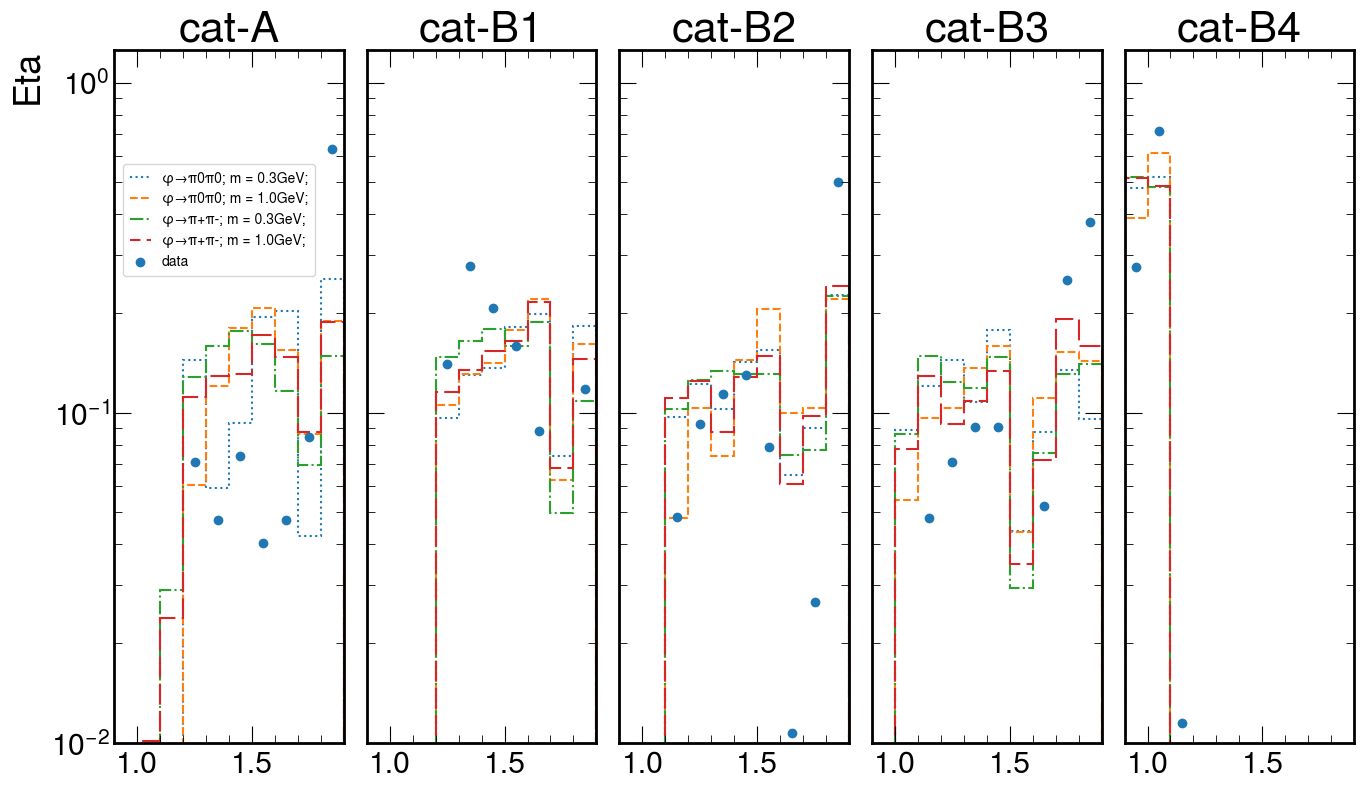

In [5]:
fig, axes = plt.subplots(1,len(prefixes), figsize = (16,9),sharex=True, sharey=True)
axes[0].set_ylabel('Eta')
for ax, cat in zip(axes, prefixes):
    allsets('Eta', cat, ax, 'cut_based_ID')
    ax.set_xlim(.9, 1.9)

for ax, col in zip(axes, prefixes):
    ax.set_title(col)
    
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc=(.09,.65), prop={'size': 10}, frameon=True)

fig.subplots_adjust(hspace=0, wspace=.1)


Text(0.5, 1.0, 'cat-A')

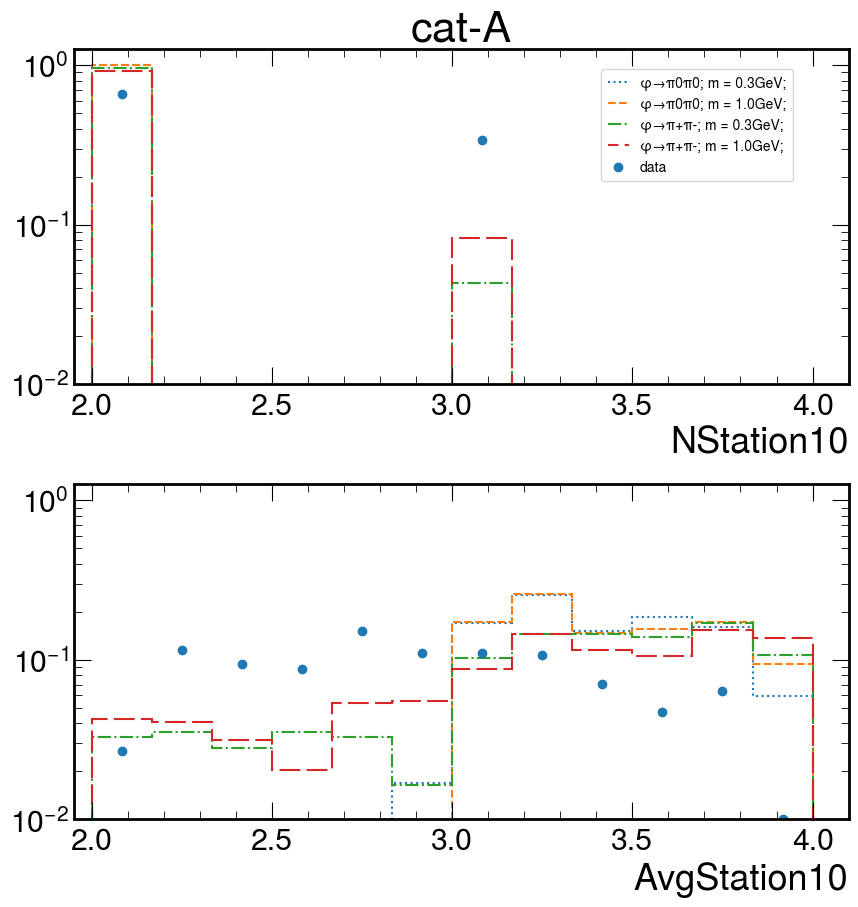

In [8]:
fig, ax = plt.subplots(2)

allsets('NStation10', 'cat-A', ax[0], 'cut_based_ID')
ax[0].set_xlim(1.95,4.1)
ax[0].set_xlabel('NStation10')

allsets('AvgStation10', 'cat-A', ax[1], 'cut_based_ID')
ax[1].set_xlim(1.95,4.1)
ax[1].set_xlabel('AvgStation10')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc=(.7,.8), prop={'size': 10}, frameon=True)

fig.subplots_adjust(hspace=.3, wspace=0)
ax[0].set_title('cat-A')


In [ ]:
def statsall(var, prefix):
    a = 1
    fig, ax = plt.subplots(1,1, figsize = (a*16,a*9))

    title = f'cscRechitCluster{var} with |cls_eta| < 1.9'
    x = out[prefix][dataset][title].to_numpy()[1]
    mi = np.min([out[prefix][dataset][title]/out[prefix][dataset][title].sum() for dataset in fileset if 'background' not in dataset], axis = 0)
    ma = np.max([out[prefix][dataset][title]/out[prefix][dataset][title].sum() for dataset in fileset if 'background' not in dataset], axis = 0)
    me = np.mean([out[prefix][dataset][title]/out[prefix][dataset][title].sum() for dataset in fileset if 'background' not in dataset], axis = 0)

    ax.fill_between(np.repeat(x, 2)[1:-1], np.repeat(mi,2), np.repeat(ma,2), alpha = .5, color = 'orange', label = 'φ→π*π* range')
    ax.plot(np.repeat(x,2)[1:-1], np.repeat(me,2), color = 'orange', label = 'φ→π*π* mean')
    ax.scatter(np.convolve(x, np.ones(2), 'valid')/2, (out[prefix]['data'][title]/out[prefix]['data'][title].sum()).view(), label = 'data')



    ax.legend()
    ax.set_xlabel(title)
    ax.set_ylabel('count')
    ax.set_yscale('log')
    
statsall('AvgStation10', 'cat-A')